In [52]:
# imports here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [2]:
# read in csv's
spotify_df = pd.read_csv('datasets/track_audio_features.csv')


In [3]:
# check out data
spotify_df

,isrc,track_name,track_spotify_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,GBARL1900429,FIND U AGAIN,1HpzOCZbNWzxvvXfSGtSrX,0.005480,0.605,176417,0.664,0.000003,8,0.2040,-7.162,1,0.0316,103.997,4,0.164
1,GB2DY2000067,RAIN,3WgEwAp8HIMNCqkA3gpRqb,0.026600,0.870,183066,0.870,0.000002,9,0.1090,-4.797,1,0.2020,150.145,4,0.830
2,GBARL1900043,BALLY,1AvLAAXMtq7IGi48x9TrD7,0.236000,0.818,165189,0.692,0.000000,5,0.0784,-3.887,0,0.2770,106.396,4,0.919
3,USUG12207230,CALIFORNIA BREEZE,6ug9fUi5oLLgQgOF1G8WkM,0.003610,0.738,177789,0.666,0.000000,5,0.1070,-6.970,0,0.4550,161.734,4,0.215
4,USRC12203886,NEVER GONNA NOT DANCE AGAIN,6sZo5nJIsFWXefRCCexpx0,0.027300,0.668,225789,0.802,0.000000,5,0.1630,-4.005,0,0.0917,113.796,4,0.769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,GBUM72107771,FLOWERS (SAY MY NAME),4UpONN1cC0MHoJUuIGOXG4,0.489000,0.700,158601,0.738,0.000000,5,0.5300,-6.345,1,0.2520,142.937,4,0.771
1266,GBUM72201012,COME & GO,2Y0wPrPQBrGhoLn14xRYCG,0.017200,0.625,205485,0.814,0.000000,0,0.1580,-5.181,1,0.0657,144.991,4,0.535
1267,GBK3W1800737,GIVE YOURSELF A TRY,4rmIfFUZhhi9sS5IYtpkXw,0.000032,0.334,196589,0.786,0.000000,11,0.5170,-5.002,1,0.0592,182.933,4,0.901
1268,GBARL1900666,STRIKE A POSE,23GvTfcGK454ppLsts3W44,0.010700,0.531,214204,0.581,0.000016,1,0.1010,-5.801,1,0.1010,137.776,5,0.591


In [5]:
spotify_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,0.233360,0.673904,198933.770079,0.644893,0.015413,5.358268,0.177106,-6.455087,0.574803,0.132675,121.687587,3.968504,0.504217
std,0.247647,0.147703,46659.021752,0.166738,0.092617,3.641542,0.130888,2.439761,0.494568,0.122691,26.836252,0.295408,0.221679
min,0.000002,0.107000,56000.000000,0.093900,0.000000,0.000000,0.024800,-25.154000,0.000000,0.023200,54.747000,1.000000,0.032000
25%,0.037500,0.588250,172905.750000,0.538000,0.000000,2.000000,0.095125,-7.647000,0.000000,0.043600,101.020500,4.000000,0.335250
50%,0.139000,0.688000,195466.000000,0.661000,0.000000,6.000000,0.123000,-6.102000,1.000000,0.074450,121.929500,4.000000,0.499500
75%,0.352750,0.775750,217829.000000,0.768750,0.000027,8.000000,0.217750,-4.820750,1.000000,0.197750,140.010750,4.000000,0.680000
max,0.979000,0.975000,629693.000000,0.990000,0.933000,11.000000,0.939000,-0.517000,1.000000,0.723000,210.164000,5.000000,0.972000


## Im going to attempt to use Russell's circumplex model of affection to categorise the tracks by mood.


![image](images/The-circumplex-model-of-emotion-Russell-1980.png)



This basically represents emotions on a two dimensional scale of valence and arousal, so positive valence and high arousal would equate to a Happy emotional state, im going to simplify this to four main emotions per the quadrants of the graph Happy, Sad, Calm and Angry.



I will take the given valence value from the spotify APi and will use the Energy value as my quantifier for arousal of the given valence.



I want to have a look and see if i can see any of the expected correlation.

In [30]:
# create a sample data set
test_data = spotify_df.sample(10)

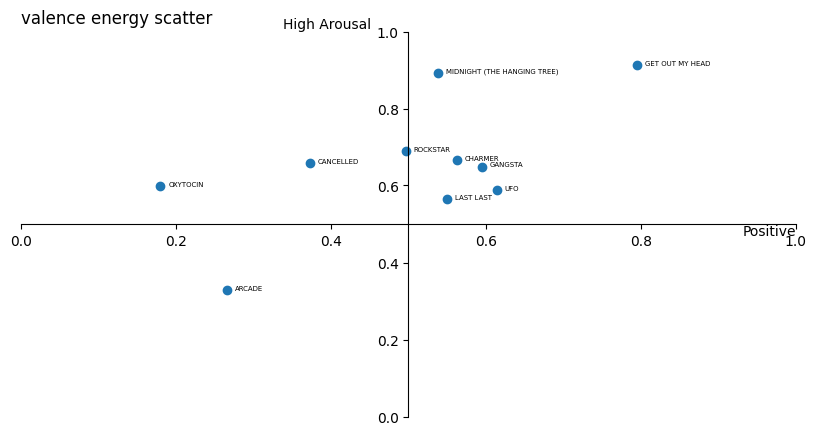

In [32]:
# plot sample onto a graph with centred valence and energy axis
#(no need for scaling these values as both are between 0-1)

fig, ax = plt.subplots(figsize=(10, 5))
# Move the left and bottom spines to x = 0.5 and y = 0.5,
ax.spines[["left", "bottom"]].set_position(("data", 0.5))
# Hide the top and right spines, just looks better
ax.spines[["top", "right"]].set_visible(False)
# Input data.
points = test_data['track_name']
x = test_data['valence']
y = test_data['energy']
ax.plot(x, y, 'o')
#add track name labels
for i, txt in enumerate(points):
   ax.annotate(txt, (x.iat[i]+0.01, y.iat[i]), size = 5)
#label up graph
plt.title('valence energy scatter', loc = 'left')
label = ax.set_xlabel('Positive', fontsize=10, loc="right", c="black")

ax.set_xlim(0, 1)
# plt.ylabel(' valence')
label = ax.set_ylabel('High Arousal', rotation = 'horizontal',fontsize=10, loc='top', c="black")
ax.xaxis.set_label_coords(1, 0.5)
ax.set_ylim(0,1)
# plt.xlabel('arousal')
plt.show()

We can see a scatter of song titles and after looking them up and having a listen i feel this is an adequate method of categorising, although mood is interpreted differently by everyone , i feel this is a close enough method.

In [49]:
# lets look at the data valued by my categories
df = spotify_df
#highest  valence track
# df[df.valence == df.valence.max()]
#highest energy track
# df[df.energy == df.energy.max()]
#lowest valence track
# df[df.valence == df.valence.min()]
#lowest energy track
df[df.energy == df.energy.min()]

,isrc,track_name,track_spotify_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
374,USSM12300149,JADED,6sEiNwV8cOQVbtvMnzZZYH,0.979,0.554,100261,0.0939,0.933,3,0.104,-25.154,1,0.0505,78.989,3,0.0772


I am now wondering if i could use a basic machine learning model, perhaps decision tree to categorise the data, and perhaps see something i can't in the numbers. Please see ML_spotify.ipynb

In [72]:
# use ML model to add mood data- test first
spotify_df = pd.read_csv('datasets/track_audio_features.csv')

#align data
data = spotify_df.drop(columns = ['isrc','speechiness','track_name','track_spotify_id'])
df = data[['danceability','energy','key','loudness','mode','acousticness',
          'instrumentalness','liveness','valence','tempo','duration_ms','time_signature']]
df
model = joblib.load('datasets/spotify_mood_classifier.joblib')

mood = model.predict(df)

mood

array(['agitated', 'happy', 'happy', ..., 'happy', 'happy', 'happy'],
      dtype=object)

In [74]:
spotify_df['mood'] = mood

In [76]:
spotify_df


,isrc,track_name,track_spotify_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,mood
0,GBARL1900429,FIND U AGAIN,1HpzOCZbNWzxvvXfSGtSrX,0.005480,0.605,176417,0.664,0.000003,8,0.2040,-7.162,1,0.0316,103.997,4,0.164,agitated
1,GB2DY2000067,RAIN,3WgEwAp8HIMNCqkA3gpRqb,0.026600,0.870,183066,0.870,0.000002,9,0.1090,-4.797,1,0.2020,150.145,4,0.830,happy
2,GBARL1900043,BALLY,1AvLAAXMtq7IGi48x9TrD7,0.236000,0.818,165189,0.692,0.000000,5,0.0784,-3.887,0,0.2770,106.396,4,0.919,happy
3,USUG12207230,CALIFORNIA BREEZE,6ug9fUi5oLLgQgOF1G8WkM,0.003610,0.738,177789,0.666,0.000000,5,0.1070,-6.970,0,0.4550,161.734,4,0.215,agitated
4,USRC12203886,NEVER GONNA NOT DANCE AGAIN,6sZo5nJIsFWXefRCCexpx0,0.027300,0.668,225789,0.802,0.000000,5,0.1630,-4.005,0,0.0917,113.796,4,0.769,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,GBUM72107771,FLOWERS (SAY MY NAME),4UpONN1cC0MHoJUuIGOXG4,0.489000,0.700,158601,0.738,0.000000,5,0.5300,-6.345,1,0.2520,142.937,4,0.771,happy
1266,GBUM72201012,COME & GO,2Y0wPrPQBrGhoLn14xRYCG,0.017200,0.625,205485,0.814,0.000000,0,0.1580,-5.181,1,0.0657,144.991,4,0.535,happy
1267,GBK3W1800737,GIVE YOURSELF A TRY,4rmIfFUZhhi9sS5IYtpkXw,0.000032,0.334,196589,0.786,0.000000,11,0.5170,-5.002,1,0.0592,182.933,4,0.901,happy
1268,GBARL1900666,STRIKE A POSE,23GvTfcGK454ppLsts3W44,0.010700,0.531,214204,0.581,0.000016,1,0.1010,-5.801,1,0.1010,137.776,5,0.591,happy


In [77]:
# export newly populated df with mood column
spotify_df.to_csv('datasets/track_audio_features_plus_mood_analysis.csv') 

In [ ]:
# all ready to be analysed!